In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay

from matplotlib import pyplot as plt


# Ejercicio 1
MDmotors es una reconocida marca de automóviles que comercializa
autos estándares y deportivos.
La categoría de un auto queda determinada por las prestaciones de su
motor: velocidad, aceleración y consumo.
Se cuenta con los datos de 100 modelos que la empresa ha comercializado
en los últimos años:  

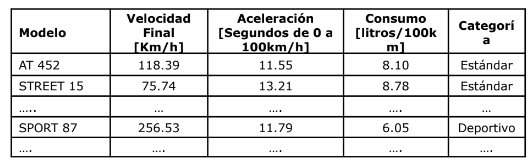  

El gerente de marketing desea clasificar los autos de la nueva línea 2013
utilizando técnicas de minería de datos, particularmente, el método del
vecino más próximo.
a. ¿Qué valor de K le recomienda utilizar?
b. ¿A qué categoría se asignarán los siguientes modelos?
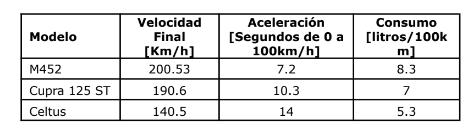

In [ ]:
autos_df = pd.read_csv("/datasets/dsAutomoviles.csv",encoding='latin-1')

In [ ]:
autos_df.head()

,Velocidad,Aceleracion,Consumo,Categoría
0,118.397137,11.555540,8.103695,Estandar
1,75.743276,13.218851,8.788647,Estandar
2,256.533405,11.793277,8.053212,Estandar
3,208.590670,10.027998,6.956417,Estandar
4,189.139549,12.509964,18.989900,Estandar


In [ ]:
autos_df.Categoría.value_counts()/df.shape[0]

Estandar     0.233645
Deportivo    0.233645
Name: Categoría, dtype: float64

Variables balanceadas

In [ ]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Velocidad    100 non-null    float64
 1   Aceleracion  100 non-null    float64
 2   Consumo      100 non-null    float64
 3   Categoría    100 non-null    object 
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [ ]:
autos_df.corr()

<ipython-input-50-c9f00bee7508>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  autos_df.corr()


,Velocidad,Aceleracion,Consumo
Velocidad,1.000000,-0.471674,0.345175
Aceleracion,-0.471674,1.000000,-0.443261
Consumo,0.345175,-0.443261,1.000000


In [ ]:
autos_df.describe()

,Velocidad,Aceleracion,Consumo
count,100.000000,100.000000,100.000000
mean,188.604799,10.114497,9.031968
std,50.213239,2.455731,2.285651
min,40.890000,5.777326,5.652413
25%,159.492533,7.967646,7.517424
50%,193.472787,9.852682,8.444727
75%,222.582928,12.219231,10.033007
max,284.489215,15.037425,18.989900


Estandarizamos las variables predictoras

In [ ]:
var_pred = ['Velocidad','Aceleracion','Consumo']

scaler = StandardScaler()
scaler.fit(autos_df[var_pred])

X = scaler.transform(autos_df[var_pred])

y = autos_df.Categoría

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=17,stratify=y)

In [ ]:
for k in range(1,10,1):
  knn = KNeighborsClassifier(k, weights= "distance")
  knn.fit(X_train, y_train)
  pred_train = knn.predict(X_train)
  pred_test = knn.predict(X_test)
  print("_______________________________________")
  print(f"K = {k}: ")
  print(f'Accuracy de K-NN train: {knn.score(X_train, y_train):.2f}')
  print(f"F1 de K-NN train: {f1_score(y_train,pred_train, average='macro'):.2f}")
  print(f'Accuracy de K-NN test: {knn.score(X_test, y_test):.2f}')
  print(f"F1 de K-NN test: {f1_score(y_test, pred_test,average='macro'):.2f}")

_______________________________________
K = 1: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.88
F1 de K-NN test: 0.88
_______________________________________
K = 2: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.88
F1 de K-NN test: 0.88
_______________________________________
K = 3: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.92
F1 de K-NN test: 0.92
_______________________________________
K = 4: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.88
F1 de K-NN test: 0.88
_______________________________________
K = 5: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.88
F1 de K-NN test: 0.88
_______________________________________
K = 6: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.88
F1 de K-NN test: 0.88
_______________________________________
K = 7: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00


Se recomienda usar un K = 3 o K = 9 ya que el modelo obtiene mejores resultados con el dataset de test.

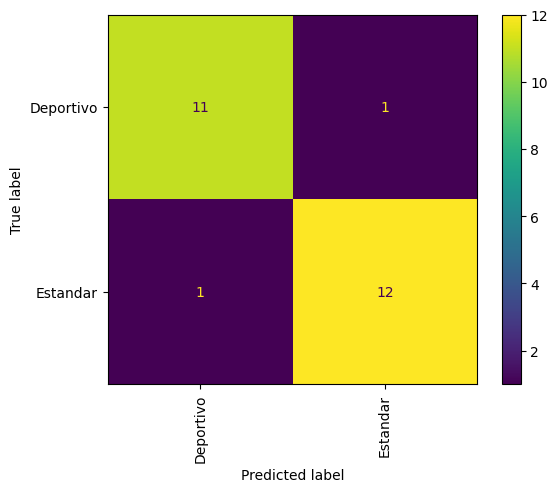

In [ ]:
knn = KNeighborsClassifier(3, weights= "distance")
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
cm_display.plot()

plt.xticks(rotation=90)
plt.show() 

In [ ]:
new_data_df = pd.DataFrame({'Velocidad':['200.53','190.6','140.5'],'Aceleracion':['7.2','10.3','14'],'Consumo':['8.3','7','5.3']})

new_data_scaled = scaler.transform(new_data_df)

In [ ]:
pred = knn.predict(new_data_scaled)
print("Predicciones")

new_data_df['Categoría'] = pred

print(new_data_df)

Predicciones
  Velocidad Aceleracion Consumo  Categoría
0    200.53         7.2     8.3  Deportivo
1     190.6        10.3       7   Estandar
2     140.5          14     5.3   Estandar


# Ejercicio 2

La clasificación de vidrios en base a su composición es una técnica muy utilizada en investigación criminalística. 

  El set de datos “VIDRIOS” corresponde a 214 observaciones de 7 clases de vidrios:
  - Ventana de edificio (procesamiento flotante)
  - Ventana de edificio (procesamiento no flotante)
  - Ventana de vehículo (procesamiento flotante)
  - Ventana de vehículo (procesamiento no flotante)
  - Contenedores
  - Vajillas
  - Faros 

  Para cada observación se disponen de los siguientes datos:  
  *RI: índice de refracción*  
  *Na: Sodio*  
  *Mg: Magnesio*   
  *Al: Aluminio*   
  *Si: Silicio*   
  *K: Potasio*   
  *Ca: Calcio*   
  *Ba: Boro*   
  *Fe: Hierro*   

  **TIPO DE VIDRIO**

  La investigadora Danna ha encontrado restos de vidrios en la escena de un robo y desea determinar a qué clase corresponde.
  El área de laboratorio ha reportado la composición del mismo:  
  RI: 1.429   Na: 15.15   Mg: 0.1  Al: 2.15  Si: 72.94  K: 0  Ca: 10.78  Ba: 0  Fe: 0

  Utilice el método de vecino más próximo para determinar qué tipo de vidrio ha encontrado la investigadora

In [ ]:
df = pd.read_csv("/datasets/vidrios.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [ ]:
df.Type.value_counts()/df.shape[0]

'build wind non-float'    0.355140
'build wind float'        0.327103
headlamps                 0.135514
'vehic wind float'        0.079439
containers                0.060748
tableware                 0.042056
Name: Type, dtype: float64

La clase "Vehic wind float" tiene una proporción de datos mucho menor. Por lo tanto el modelo no clasificará correctamente este tipo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
df.describe()
#Se observa que tienen distintos rangos. 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Matriz de Correlación

In [ ]:
df.corr()

<ipython-input-36-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


### Estadarización de las variables
Aplicamos la normalización Z-score que consiste en dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.

Armamos nuestro dataset X de variables predictoras y definimos en y la variable a predecir.

In [ ]:
list_pred = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']

scaler = StandardScaler()
scaler.fit(df[list_pred])

X = scaler.transform(df[list_pred])

y = df.Type

Dividimos el dataset en entrenamiento y test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=17,stratify=y)

### Entrenamiento del modelo
Entrenamos el modelo KNN. Usamos el parametro **weights** que pondera los puntos por la inversa de su distancia. En este caso, los vecinos más cercanos de un punto de consulta tendrán una mayor influencia que los vecinos más alejados. 
Probamos valores de K entre 1 y 10 vecinos mas cercanos.

In [ ]:
for k in range(1,10,1):
  knn = KNeighborsClassifier(k, weights= "distance")
  knn.fit(X_train, y_train)
  pred_train = knn.predict(X_train)
  pred_test = knn.predict(X_test)
  print("_______________________________________")
  print(f"K = {k}: ")
  print(f'Accuracy de K-NN train: {knn.score(X_train, y_train):.2f}')
  print(f"F1 de K-NN train: {f1_score(y_train,pred_train, average='macro'):.2f}")
  print(f'Accuracy de K-NN test: {knn.score(X_test, y_test):.2f}')
  print(f"F1 de K-NN test: {f1_score(y_test, pred_test,average='macro'):.2f}")

_______________________________________
K = 1: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.80
F1 de K-NN test: 0.80
_______________________________________
K = 2: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.80
F1 de K-NN test: 0.80
_______________________________________
K = 3: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.80
F1 de K-NN test: 0.83
_______________________________________
K = 4: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.80
F1 de K-NN test: 0.77
_______________________________________
K = 5: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.78
F1 de K-NN test: 0.75
_______________________________________
K = 6: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.80
F1 de K-NN test: 0.76
_______________________________________
K = 7: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00


Para el modelo utilizaremos K igual a 3 que nos da los mejores resultados con los datos de test.

In [ ]:
  knn = KNeighborsClassifier(3, weights= "distance")
  knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

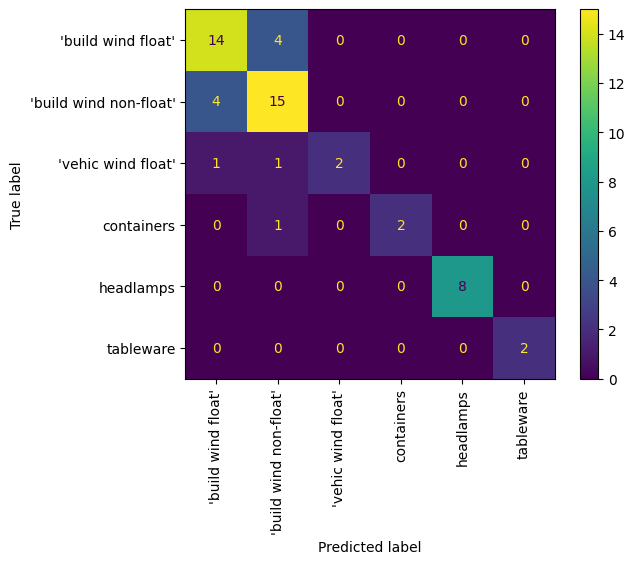

In [ ]:
pred = knn.predict(X_test)

cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
cm_display.plot()

plt.xticks(rotation=90)
plt.show() 

En la matriz de confusión podemos observar que el modelo tiene un buen rendimiento en las variables excepto para 'vehic wind float'.

### Predicción sobre los datos solicitados

In [ ]:
new_data = pd.read_csv("/datasets/vidrio_a_clasificar.csv")

new_data.rename(columns={'  Mg':'Mg',' K':'K'},inplace=True)

Estandarizamos los datos

In [ ]:
new_data_scaled = scaler.transform(new_data)

Predicción

In [ ]:
prediccion = knn.predict(new_data_scaled)[0]

new_data['Type'] = prediccion

new_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.429,15.15,0.1,2.15,72.94,0,10.78,0,0,tableware


# Ejercicio 3
En la ciudad de Phoenix, capital de Arizona, se han efectuado pruebas
sobre 616 mujeres para diagnosticar diabetes.
De cada prueba, se han recolectado los siguientes datos:
* Cantidad de embarazos
* Concentración de glucosa en plasma
* Presión arterial (mm Hg)
* Grosor del pliegue cutáneo (mm)
* Insulina en suero (mu U / ml)
* IMC (Índice de Masa Corporal)
* Valor en evaluación de antecedentes familiares
* Edad
* Resultado de la prueba (positivo/negativo)
Utilice el método de vecino más cercano para predecir si los siguientes
pacientes tienen altas probabilidades de padecer la enfermedad:  
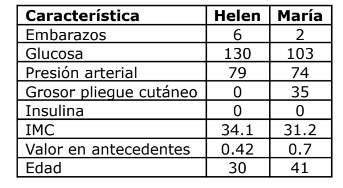

In [ ]:
db_df = pd.read_csv("/content/Datos/diabetes.csv")

db_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,1,146,56,0,0,29.7,0.564,29,tested_negative
1,2,95,54,14,88,26.1,0.748,22,tested_negative
2,6,0,68,41,0,39.0,0.727,41,tested_positive
3,9,184,85,15,0,30.0,1.213,49,tested_positive
4,7,194,68,28,0,35.9,0.745,41,tested_positive


In [ ]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    616 non-null    int64  
 1   plas    616 non-null    int64  
 2   pres    616 non-null    int64  
 3   skin    616 non-null    int64  
 4   insu    616 non-null    int64  
 5   mass    616 non-null    float64
 6   pedi    616 non-null    float64
 7   age     616 non-null    int64  
 8   class   616 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 43.4+ KB


In [ ]:
db_df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,3.993506,123.832792,69.022727,20.758117,86.084416,32.423701,0.484581,33.743506
std,3.437709,32.723969,19.989008,16.157807,122.978137,8.184466,0.339677,11.699453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.800000,0.250500,24.000000
50%,3.000000,120.000000,72.000000,23.000000,36.500000,32.500000,0.388500,30.000000
75%,6.000000,144.250000,80.000000,33.000000,140.000000,37.100000,0.640000,41.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
db_df['class'].value_counts()/db_df.shape[0]

tested_negative    0.564935
tested_positive    0.435065
Name: class, dtype: float64

In [ ]:
x_predict = ['preg','plas','pres','skin','insu','mass','pedi','age']
scaler = StandardScaler()

scaler.fit(db_df[x_predict])

X = scaler.transform(db_df[x_predict])

y = db_df['class']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 17,stratify=y)

Buscamos el valor de K que da mejores resultados

In [ ]:
for k in range(1,10,1):
  knn = KNeighborsClassifier(k, weights= "distance")
  knn.fit(X_train, y_train)
  pred_train = knn.predict(X_train)
  pred_test = knn.predict(X_test)
  print("_______________________________________")
  print(f"K = {k}: ")
  print(f'Accuracy de K-NN train: {knn.score(X_train, y_train):.2f}')
  print(f"F1 de K-NN train: {f1_score(y_train,pred_train, average='macro'):.2f}")
  print(f'Accuracy de K-NN test: {knn.score(X_test, y_test):.2f}')
  print(f"F1 de K-NN test: {f1_score(y_test, pred_test,average='macro'):.2f}")

_______________________________________
K = 1: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.64
F1 de K-NN test: 0.63
_______________________________________
K = 2: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.64
F1 de K-NN test: 0.63
_______________________________________
K = 3: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.66
F1 de K-NN test: 0.65
_______________________________________
K = 4: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.68
F1 de K-NN test: 0.66
_______________________________________
K = 5: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.66
F1 de K-NN test: 0.65
_______________________________________
K = 6: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00
Accuracy de K-NN test: 0.66
F1 de K-NN test: 0.65
_______________________________________
K = 7: 
Accuracy de K-NN train: 1.00
F1 de K-NN train: 1.00


In [ ]:
#Usamos K=8

knn = KNeighborsClassifier(8,weights="distance")
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [ ]:
pred = knn.predict(X_test)

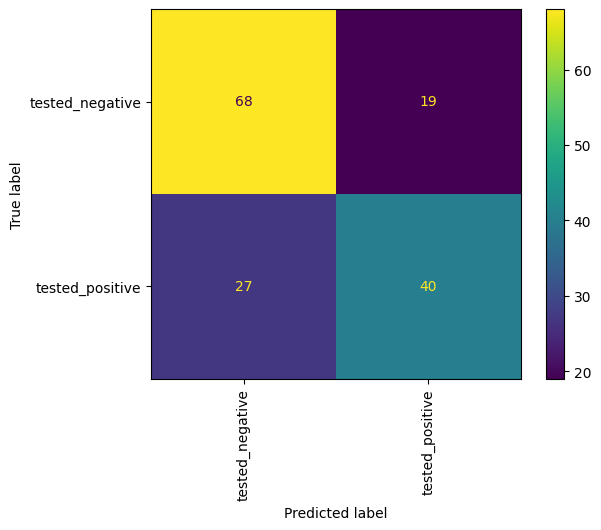

In [ ]:
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=knn.classes_)
cm_display.plot()
plt.xticks(rotation=90)
plt.show() 

In [ ]:
rows = [[6,130,79,0,0,34.1,0.42,30],[2,103,74,35,0,31.2,0.7,41]]
new_data = pd.DataFrame(data=rows,columns=['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'])
new_data

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,130,79,0,0,34.1,0.42,30
1,2,103,74,35,0,31.2,0.70,41


In [ ]:
new_data_scaled = scaler.transform(new_data)

predict = knn.predict(new_data_scaled)

new_data['Resultado prueba'] = predict

new_data

,preg,plas,pres,skin,insu,mass,pedi,age,Resultado prueba
0,6,130,79,0,0,34.1,0.42,30,tested_positive
1,2,103,74,35,0,31.2,0.70,41,tested_negative
